In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

import arviz as az

In [2]:
az.style.use('arviz-white')

# Using JAGS for concussions data

## Chapter 3.3: Introduction to PyMC3

The response is the total number of concussions (summing across teams and games) in each year from 2012-2015.  We fit the model

$$\gamma\sim\mbox{Gamma}(0.1,0.1)$$
$$\lambda_i\sim\mbox{Gamma}(1,\gamma)$$
$$ Y_i\sim\mbox{Poisson}(N\lambda_i)$$



We have previously coded Gibbs sampling for this problem, and here e verify that we obtain the same results using PyMC3.

## Load concussions data

In [3]:
# Number of concussions in 2012-2015
Y = np.array([171, 152, 123, 199])
n = 4
N = 256

In [4]:
with pm.Model() as model:
    # Priors
    γ = pm.Gamma('γ', 0.1, 0.1)
    λ = pm.Gamma('λ', 1, γ, shape=4)
    #likelihood
    y = pm.Poisson('y', N*λ, observed=Y)
    trace = pm.sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [λ, γ]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:02<00:00, 2174.40draws/s]


## Summarize the output

In [5]:
az.summary(trace)

,mean,sd,mcse_mean,mcse_sd,hpd_3%,hpd_97%,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
γ,1.545,0.768,0.012,0.008,0.278,2.903,4274.0,4085.0,3777.0,2444.0,1.0
λ[0],0.668,0.050,0.001,0.001,0.576,0.764,4628.0,4600.0,4639.0,3187.0,1.0
λ[1],0.594,0.049,0.001,0.000,0.509,0.690,5332.0,5327.0,5303.0,3416.0,1.0
λ[2],0.482,0.043,0.001,0.000,0.400,0.558,4526.0,4460.0,4586.0,3215.0,1.0
λ[3],0.776,0.055,0.001,0.000,0.674,0.879,6112.0,6112.0,6084.0,2959.0,1.0


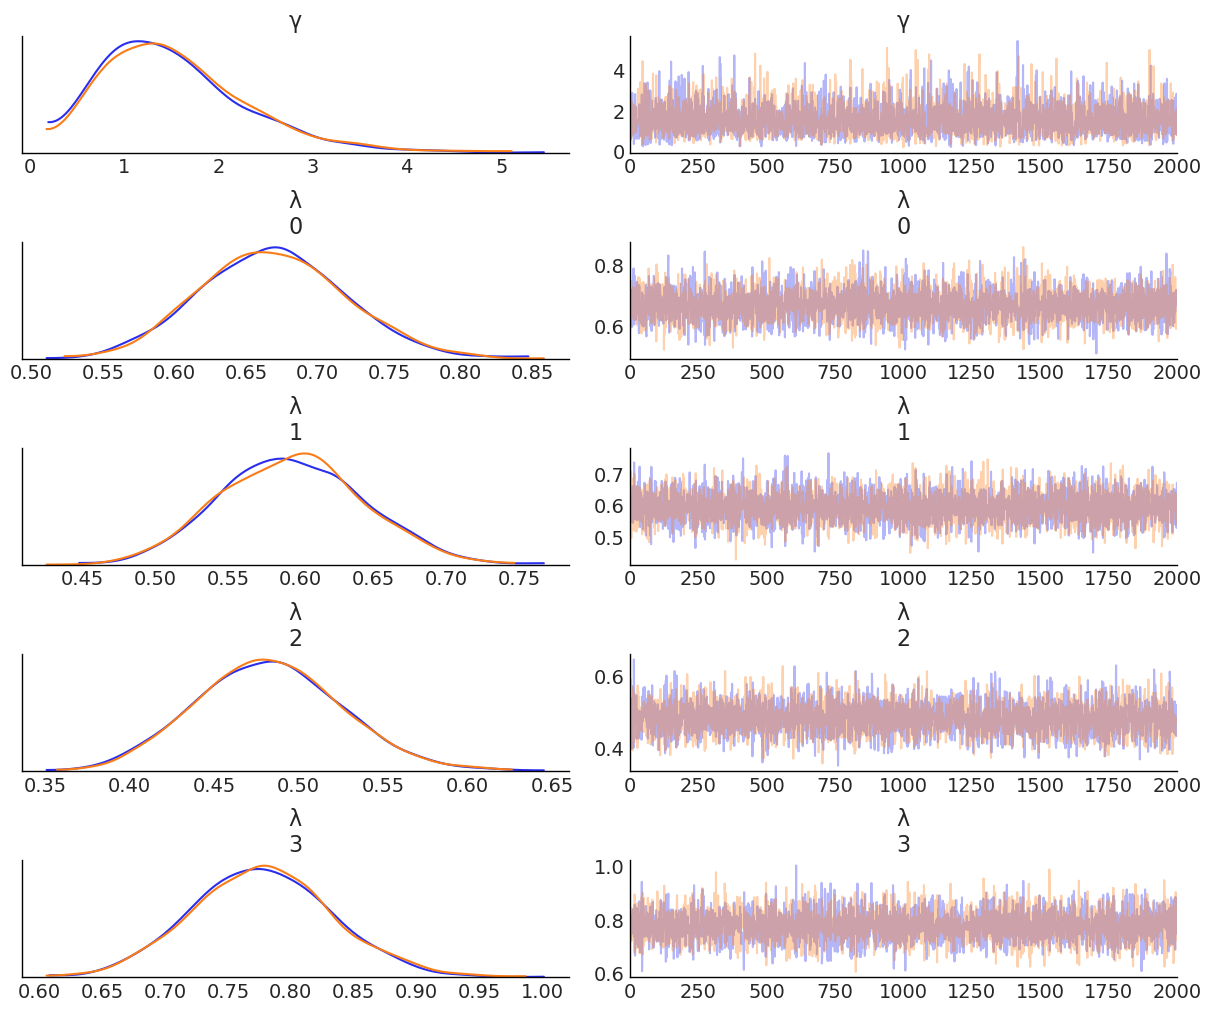

In [6]:
az.plot_trace(trace);